Suren Gunturu

In [1]:
import numpy as np
from scipy import linalg as ln

## Problem 16a

In [2]:
A = np.random.normal(size = (10, 10))
b = np.random.normal(size = (10, 1))
x = ln.solve(A, b)
x

array([[-0.42884827],
       [ 2.27018374],
       [ 0.54755474],
       [-1.29687755],
       [ 0.05068742],
       [ 0.37156763],
       [ 0.19066088],
       [-1.11694459],
       [-0.00840326],
       [-0.53466697]])

## Problem 16b

In [3]:
A = np.arange(1, 101).reshape(10, 10)
v = np.arange(1, 11).reshape(10, 1)
b = np.ones([10, 1])
Av = np.dot(A, v)
print(Av)
x = ln.solve(A, v)

[[ 385]
 [ 935]
 [1485]
 [2035]
 [2585]
 [3135]
 [3685]
 [4235]
 [4785]
 [5335]]


LinAlgError: Matrix is singular.

## Problem 16c

The matrix equation from problem 16b raised an error because the matrix with entries from 1 to 100 consecutively does not have a linear combination of columns that lead to the resulting vector from 1 to 10 consecutively. Therefore, pivots don't occur in every row of that matrix A and so it is considered to be singular or not invertible as shown in the LinAlgError. There is no unique solution x for Ax = v

## Problem 16d

In [29]:
import time

In [31]:
avg_time = np.array([])
for k in np.arange(0, 15):
    time1 = np.array([])
    for i in np.arange(10): 
        start_time = time.time()
        A = np.random.normal(size = (2 ** k, 2 ** k))
        b = np.random.normal(size = (2 ** k, 1))
        ln.solve(A, b)
        time2 = time.time() - start_time
        time1 = np.append(time1, time2)
    avg_time = np.append(avg_time, np.mean(time1))

In [34]:
avg_log_time = np.log(avg_time) / np.log(2)
k = np.arange(0, 15)

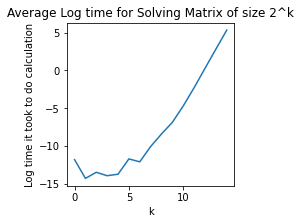

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (3, 3))
ax.plot(k, avg_log_time)
ax.set_title("Average Log time for Solving Matrix of size 2^k")
ax.set_xlabel("k")
ax.set_ylabel("Log time it took to do calculation")
plt.show()

This plot shows that as k increases, the log time it takes to solve the Matrix goes up exponentially, especially by the point k is greater than 5. Before that, the time fluctuates and there are no real patterns. 

## Problem 16e

In [5]:
def BackSub(A, b): 
    if A.shape[0] != A.shape[1]: 
        raise ValueError('The Matrix Needs to Be Square')
    if len(b.shape) != 1 and b.shape[1] != 1: 
        raise ValueError('Error: Not a Vector')
    if A.shape[1] != b.shape[0]: 
        raise ValueError("Error: invalid dimensions")
    for i in np.arange(A.shape[0]): 
        if (A[i][i] == 0): 
            raise ValueError("Error: Not valid input")
        if i > 0: 
            for j in np.arange(i): 
                if A[i][j] != 0: 
                    raise ValueError("Not Valid Input")
    soln = np.array([])
    for i in np.arange(A.shape[0] - 1, -1, -1): 
        if len(b.shape) == 1: 
            res = b[i]
        else: 
            res = b[i][0]
        for j in np.arange(len(soln)): 
            res -= A[i][A.shape[1] - j - 1] * soln[j]
        soln = np.insert(soln, 0, res / A[i][i])
    return soln

In [6]:
A = np.array([2, 1, 1, 1, 2, 1, 1, 1, 2]).reshape([3, 3])
b = np.array([0, 0, 1])
x = BackSub(A, b)
x

ValueError: Not Valid Input

In [20]:
np.triu(A)

array([[2, 1, 1],
       [0, 2, 1],
       [0, 0, 2]])